In [ ]:
#----------------------------------------------
#%%             Import Libraries
#----------------------------------------------
import numpy as np
import pandas as pd
import keras as k
import zipfile
import glob
import os
import cv2
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
pretrained_model = k.applications.resnet50.ResNet50(weights= 'imagenet')
print('Output_layer_type= {}'.format(pretrained_model.layers[-1]))
print('Output_layer_shape= {}'.format(pretrained_model.layers[-1].output_shape))
pretrained_model.layers.pop()
print('Output_layer_type= {}'.format(pretrained_model.layers[-1]))
print('Output_layer_shape= {}'.format(pretrained_model.layers[-1].output_shape))
# Freez pretrained layers
for layer in pretrained_model.layers:
    layer.trainable = False

pretrained_model.layers[-2].trainable = True  
pretrained_model.layers[-1].trainable = True  

102858752/102853048 [==============================] - 3s 0us/step
Output_layer_type= <keras.layers.core.Dense object at 0x7f10901ed7f0>
Output_layer_shape= (None, 1000)
Output_layer_type= <keras.layers.pooling.GlobalAveragePooling2D object at 0x7f10901e6c88>
Output_layer_shape= (None, 2048)


# New Section

In [ ]:
num_class = 120
model = k.models.Sequential()
model.add(pretrained_model)
# model.add(k.layers.Flatten())
# model.add(k.layers.GlobalAveragePooling2D())
model.add(k.layers.Dense(1024, activation='relu'))
model.add(k.layers.Dense(num_class, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
callbacks_list = [k.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]
model.summary()

print('Input Shape = {}'.format(model.layers[0].input_shape))
print('Shape Shape = {}'.format(model.layers[-1].output_shape))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 1000)              23587712  
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1025024   
_________________________________________________________________
dense_4 (Dense)              (None, 120)               123000    
Total params: 24,735,736
Trainable params: 1,148,024
Non-trainable params: 23,587,712
_________________________________________________________________
Input Shape = (None, 224, 224, 3)
Shape Shape = (None, 120)


In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
zip_ref = zipfile.ZipFile("/content/drive/My Drive/dog-breed-identification.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

In [ ]:
train_labels=pd.read_csv('/tmp/labels.csv')
train_labels['id'] =  train_labels['id']+'.jpg'
my_map={}


In [ ]:
Y_train=[]
for i in range(len(train_labels)):
  my_map[train_labels['id'][i]]=train_labels['breed'][i]
  Y_train.append(train_labels['breed'][i])

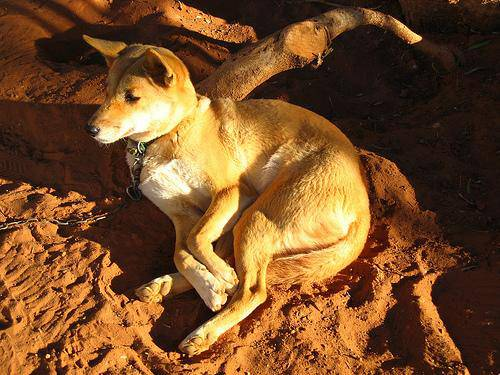

airedale


In [ ]:
train="/tmp/train"
train_labels['id'][1]
from IPython.display import display, Image
display(Image(filename='/tmp/train/'+train_labels['id'][1]))
print(my_map['443ce8abc282ddf4777f33c5ba25159d.jpg'])

In [ ]:
training_dogs_img = []
#training_label = []
alter=""
mopa=[]
for dir_path in glob.glob(train):
    for img_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        img = cv2.imread(img_path)
        img = cv2.resize(img, (224, 224))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        training_dogs_img.append(img)       
        mopa.append(img_path)
training_dogs_img = np.array(training_dogs_img)

In [ ]:
#len(training_dogs_img)
mopa[1]

'/tmp/train/68eb8c084be557e165867f8fdcf4636e.jpg'

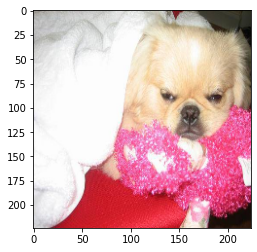

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(training_dogs_img[1])

In [ ]:
test_dogs_img = []

test="/tmp/test"
for dir_path in glob.glob(test):
    for img_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        img = cv2.imread(img_path)
        img = cv2.resize(img, (224, 224))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        test_dogs_img.append(img)
        alter=dir_path
test_dogs_img = np.array(test_dogs_img)

In [ ]:
test_labels=pd.read_csv("/tmp/sample_submission.csv")
test_labels['id'] =  test_labels['id']+'.jpg'
test_targets=[]
#test_labels.columns[0]
test_labels
#test_targets.shape

In [ ]:
for i in range(0,len(test_labels)):
  maxi=-0.0001
  max_breed_name=""
  
  for j in range(1,test_labels.shape[1]-1):    
    if(test_labels[test_labels.columns[j]][i]>maxi):
      maxi=test_labels[test_labels.columns[j]][i]
      max_breed_name=test_labels.columns[j]
  test_targets.append(max_breed_name)

AttributeError: ignored

In [ ]:
test_targets=np.array(test_targets)
test_targets=test_targets.reshape(-1,1)
test_targets
print(len(test_labels))

10357


In [ ]:
test_labels['breed']=test_targets
test_labels.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier,breed
0,000621fb3cbb32d8935728e48679680e.jpg,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,affenpinscher
1,00102ee9d8eb90812350685311fe5890.jpg,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,affenpinscher
2,0012a730dfa437f5f3613fb75efcd4ce.jpg,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,affenpinscher
3,001510bc8570bbeee98c8d80c8a95ec1.jpg,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333

In [ ]:
datagen = ImageDataGenerator(rescale=1./255.,validation_split=0.25)

In [ ]:
train_iter=datagen.flow_from_dataframe(
dataframe=train_labels,
directory="/tmp/train",
x_col="id",
y_col="breed",
subset="training",
class_mode="categorical",
target_size=(224,224))

Found 0 validated image filenames belonging to 0 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 10222 invalid image filename(s) in x_col="id". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [ ]:
train_gen = datagen.flow_from_dataframe(train_labels, # Dataframe
                                        directory="/tmp/train", # path of the files inside the colab
                                        x_col="id", # Column for picture titles example: fe9e09be6594f626f0d711bfba10cfe0.jpg
                                        y_col="breed", # Column for breed "As is"
                                        #weight_col=None,
                                        target_size=(224,224), # Dimension of input layer
                                        color_mode="rgb", # RGB as in 3 dimension 
                                        #classes=None,
                                        class_mode="categorical", # Type of y_col Categorical "text", etc..
                                        batch_size=32, # Generator batches
                                        shuffle=True, # Randomize
                                        seed=42, # Random Seed
                                        #save_to_dir=None, # In case you want to save data picture changes
                                        #save_prefix="",
                                        #save_format="png",
                                        #subset=None,
                                        interpolation="nearest", # Rescaling algorithm 
                                        validate_filenames=True
                                        )

Found 10222 validated image filenames belonging to 120 classes.


In [ ]:
train_gen.image_shape

(224, 224, 3)

In [ ]:
model.fit_generator(generator=train_gen,steps_per_epoch=128,epochs=80)

Epoch 1/80
128/128 [==============================] - 18s 137ms/step - loss: 1.5809 - accuracy: 0.5854
Epoch 2/80
128/128 [==============================] - 17s 136ms/step - loss: 1.5469 - accuracy: 0.5959
Epoch 3/80
128/128 [==============================] - 18s 142ms/step - loss: 1.5219 - accuracy: 0.6077
Epoch 4/80
128/128 [==============================] - 18s 139ms/step - loss: 1.5108 - accuracy: 0.6035
Epoch 5/80
128/128 [==============================] - 17s 134ms/step - loss: 1.4831 - accuracy: 0.5984
Epoch 6/80
128/128 [==============================] - 17s 136ms/step - loss: 1.4237 - accuracy: 0.6211
Epoch 7/80
128/128 [==============================] - 17s 136ms/step - loss: 1.4562 - accuracy: 0.6118
Epoch 8/80
128/128 [==============================] - 17s 136ms/step - loss: 1.4026 - accuracy: 0.6355
Epoch 9/80
128/128 [==============================] - 17s 134ms/step - loss: 1.3391 - accuracy: 0.6421
Epoch 10/80
128/128 [==============================] - 17s 136ms/step - l

In [ ]:
test_gen = datagen.flow_from_dataframe(  test_labels, # Dataframe
                                        directory="/tmp/test", # path of the files inside the colab
                                        x_col="id", # Column for picture titles example: fe9e09be6594f626f0d711bfba10cfe0.jpg
                                        y_col="breed", # Column for breed "As is"
                                        #weight_col=None,
                                        target_size=(224,224), # Dimension of input layer
                                        color_mode="rgb", # RGB as in 3 dimension 
                                        #classes=None,
                                        class_mode="categorical", # Type of y_col Categorical "text", etc..
                                        batch_size=32, # Generator batches
                                        shuffle=True, # Randomize
                                        seed=42, # Random Seed
                                        #save_to_dir=None, # In case you want to save data picture changes
                                        #save_prefix="",
                                        #save_format="png",
                                        #subset=None,
                                        interpolation="nearest", # Rescaling algorithm 
                                        validate_filenames=True
                                        )

Found 10357 validated image filenames belonging to 1 classes.


In [ ]:
xx = np.expand_dims(training_dogs_img[1], axis=0)
predict=model.predict(xx)
predict_class = np.argmax(predict, axis=1)
answer=predict_class[0]
class_mapping = train_gen.class_indices

for i in class_mapping:
  if(class_mapping[i]==answer):
    print(i)

shih-tzu


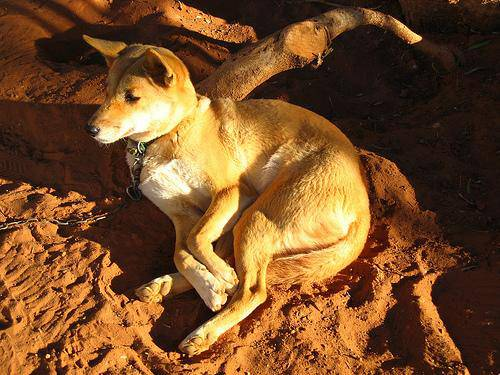

In [ ]:
from IPython.display import display, Image
display(Image(filename='/tmp/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg'))

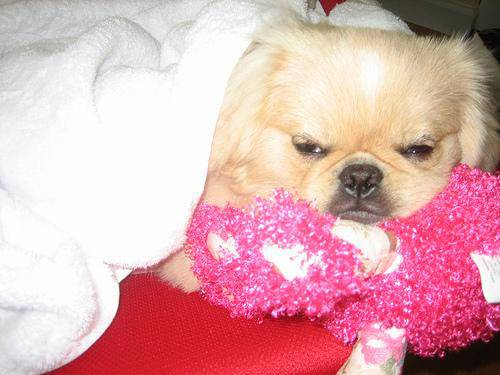

pekinese


In [ ]:
from IPython.display import display, Image
display(Image(filename='/tmp/train/68eb8c084be557e165867f8fdcf4636e.jpg'))
print(my_map['68eb8c084be557e165867f8fdcf4636e.jpg'])